In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
train_data = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
test_data = pd.read_csv('/kaggle/input/random-linear-regression/test.csv')
train_data.head()


,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


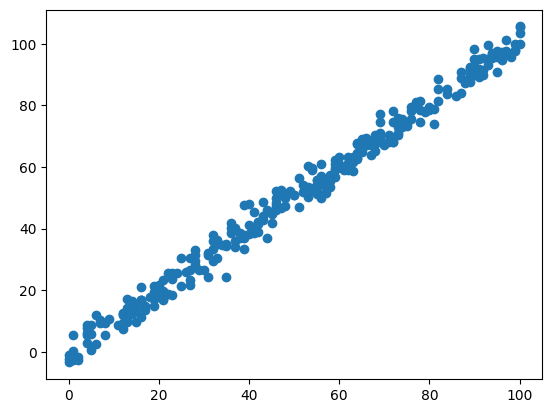

In [3]:
# plotting data
x_train = train_data['x']
x_train = x_train.values.reshape(-1,1)
y_train = train_data['y']
plt.scatter(x_train,y_train)

In [4]:
# z-score normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [5]:
# model fitting
sgdr = SGDRegressor(max_iter = 1000000)
sgdr.fit(x_train,y_train)

SGDRegressor(max_iter=1000000)

In [6]:
# w and b parameters
b = sgdr.intercept_
w_coef = sgdr.coef_
print(b, w_coef)

[51.19661695] [28.86442189]


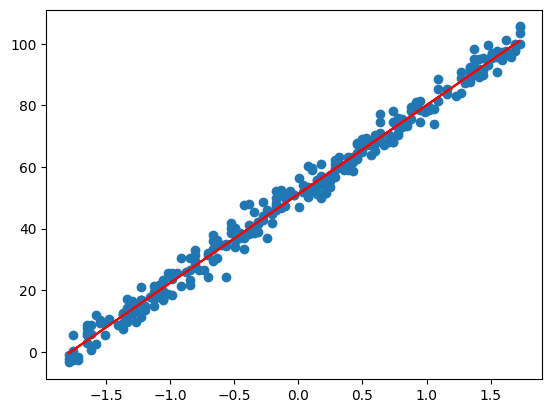

In [7]:
# plotting model line against data
plt.plot(x_train, w_coef * x_train + b,c='r')
plt.scatter(x_train,y_train)
plt.show()

In [8]:
# sample data
actual_value = train_data.at[3,'y']
sample_data = train_data.at[3,'x']

# normalization
mean = 50.936667
std = 28.504286
x_example = (sample_data - mean)/std


# making a prediction
prediction = w_coef * x_example + b

# real value : 17.857388
print(f"model prediction : {prediction}")
print(f"actual value: {actual_value}")
precision = np.abs(((actual_value - prediction)/ actual_value ) * 100)
print(f"model average precision: {100 - precision}")

model prediction : [19.86908228]
actual value: 17.85738813
model average precision: [88.73466752]
